In [ ]:
Case Study
Objective:
    
• Employ SVM from scikit learn for binary classification.
• Impact of preprocessing data and hyper paramter search using grid search.

Questions:
    
1. Load the data from “college.csv” that has attributes collected about private and public colleges 
for a particular year. We will try to predict the private/public status of the college from other attributes.

2. Use LabelEncoder to encode the target variable in to numerical form 
and split the data such that 20% of the data is set aside for testing.
3. Fit a linear svm from scikit learn and observe the accuracy. [Hint: Use Linear SVC]
4. Preprocess the data using StandardScalar and fit the same model again and observe the change in accuracy.
[Hint: Refer to scikitlearn’s preprocessing methods]
5. Use scikit learn’s gridsearch to select the best hyperparameter for a non-linear SVM, identify the model with best score and its parameters.
[Hint: Refer to model_selection module of Scikit learn]

In [1]:
#1. Load the data from “college.csv” that has attributes collected about private and public colleges 
#for a particular year. We will try to predict the private/public status of the college from other attributes.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_9_Supervised_Learning-II/College.csv'

df=pd.read_csv(data)

df.head(7)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63


In [2]:
#2. Use LabelEncoder to encode the target variable in to numerical form and split the data such that 20% of the data is set aside for testing.

#Preprocessing: label encoder and normalization
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Private"] = le.fit_transform(df["Private"])
le.classes_



array(['No', 'Yes'], dtype=object)

In [3]:
df.head(6)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,1,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [4]:
df[:]=preprocessing.MinMaxScaler().fit_transform(df)
df.head()



,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,1.0,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,1.0,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,1.0,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,1.0,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


In [5]:
Y=df['Private']

X=df.iloc[:,1:]

In [6]:
X.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


In [7]:
Y.head(5)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Private, dtype: float64

In [8]:
df.shape

(777, 18)

In [9]:
df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.727156,0.060830,0.074141,0.117189,0.279564,0.514249,0.113030,0.039125,0.418423,0.406294,0.202041,0.166510,0.680634,0.732930,0.310716,0.355373,0.122046,0.513549
std,0.445708,0.080607,0.093347,0.146166,0.185688,0.217635,0.153962,0.069724,0.207800,0.172871,0.073576,0.103370,0.171875,0.193715,0.106122,0.193622,0.098437,0.159053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014475,0.020260,0.032563,0.147368,0.351648,0.027076,0.004305,0.257231,0.286412,0.166667,0.091603,0.568421,0.618421,0.241287,0.203125,0.067205,0.398148
50%,1.000000,0.030763,0.039531,0.062765,0.231579,0.494505,0.049771,0.016121,0.395145,0.381463,0.180036,0.145038,0.705263,0.763158,0.297587,0.328125,0.097857,0.509259
75%,1.000000,0.073793,0.089573,0.136385,0.357895,0.659341,0.122715,0.044241,0.546746,0.515448,0.224599,0.221374,0.810526,0.894737,0.375335,0.484375,0.144099,0.629630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


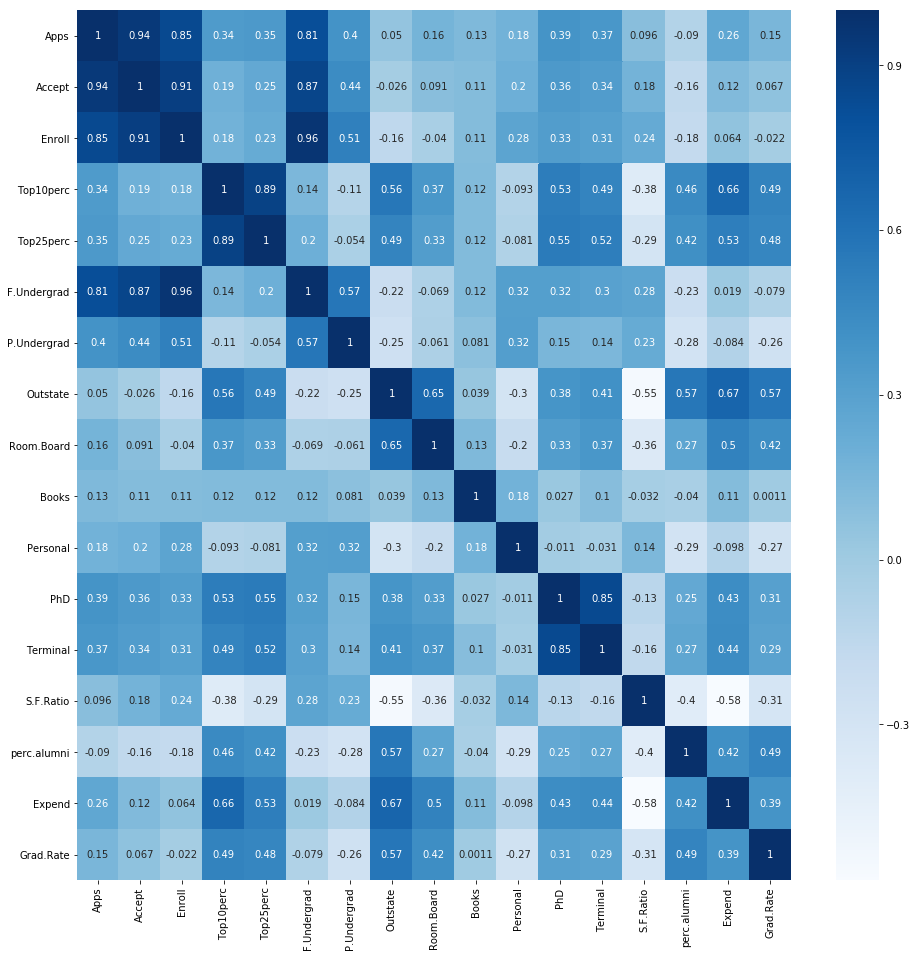

In [10]:
#finding correlation

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.iloc[:, 1:].corr()
plt.figure(figsize=(16,16))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(X,Y, test_size=0.2,random_state=10)

In [12]:
#3. Fit a linear svm from scikit learn and observe the accuracy. [Hint: Use Linear SVC]

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9358974358974359


In [14]:
y_train.head(6)

532    1.0
277    0.0
333    0.0
262    1.0
757    1.0
478    1.0
Name: Private, dtype: float64

In [15]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9391304347826087
Recall: 0.972972972972973


In [16]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.84      0.88        45
        1.0       0.94      0.97      0.96       111

avg / total       0.94      0.94      0.93       156



In [17]:
#4. Preprocess the data using StandardScalar and fit the same model again and observe the change in accuracy.
#[Hint: Refer to scikitlearn’s preprocessing methods]

df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.727156,0.060830,0.074141,0.117189,0.279564,0.514249,0.113030,0.039125,0.418423,0.406294,0.202041,0.166510,0.680634,0.732930,0.310716,0.355373,0.122046,0.513549
std,0.445708,0.080607,0.093347,0.146166,0.185688,0.217635,0.153962,0.069724,0.207800,0.172871,0.073576,0.103370,0.171875,0.193715,0.106122,0.193622,0.098437,0.159053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014475,0.020260,0.032563,0.147368,0.351648,0.027076,0.004305,0.257231,0.286412,0.166667,0.091603,0.568421,0.618421,0.241287,0.203125,0.067205,0.398148
50%,1.000000,0.030763,0.039531,0.062765,0.231579,0.494505,0.049771,0.016121,0.395145,0.381463,0.180036,0.145038,0.705263,0.763158,0.297587,0.328125,0.097857,0.509259
75%,1.000000,0.073793,0.089573,0.136385,0.357895,0.659341,0.122715,0.044241,0.546746,0.515448,0.224599,0.221374,0.810526,0.894737,0.375335,0.484375,0.144099,0.629630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9423076923076923


In [21]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.91      0.89      0.90        45
        1.0       0.96      0.96      0.96       111

avg / total       0.94      0.94      0.94       156



In [23]:
#5. Use scikit learn’s gridsearch to select the best hyperparameter for a non-linear SVM, identify the model 
#with best score and its parameters.
#[Hint: Refer to model_selection module of Scikit learn]

In [30]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7307692307692307, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7294685990338164, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7330097087378641, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8695652173913043, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8689320388349514, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .................................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.7307692307692307, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.7294685990338164, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.7330097087378641, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9134615384615384, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9420289855072463, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9320388349514563, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [31]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [32]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=10,gamma=0.01) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [33]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9294871794871795


In [34]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

             precision    recall  f1-score   support

        0.0       0.90      0.84      0.87        45
        1.0       0.94      0.96      0.95       111

avg / total       0.93      0.93      0.93       156

